In [20]:
# reqeusts, bs4 import
import requests
import bs4
# BeautifulSoup 클래스 import
from bs4 import BeautifulSoup

from urllib.parse import urljoin
from IPython.display import Image, display

In [21]:
# IT/과학 뉴스 
section_dict = {
    '최신뉴스' : 'recent?mid=n0100', 
    '정치' : 'section?mid=n0200', 
    '경제' : 'section?mid=n0300', 
    '사회' : 'section?mid=n0400', 
    '세계' : 'section?mid=n0500', 
    'IT/과학' : 'section?mid=n0600'
}

def print_news_nate(section):  # print_new_nate(최신뉴스스)
    
    base_url = "https://news.nate.com/"
    sid = section_dict[section]
    url = urljoin(base_url, sid)

    # req_param = {"sid": sid}
    # url = "https://news.naver.com/section/{sid}".format(**req_param)

    print(f'=====> {url} {section} 뉴스 <=====')

    # 요청 헤더 설정 : 브라우저 정보 (기계가 아니라 사람처럼 보이게 하려고 설정하는 것)
    req_header = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36"
    }

    # requests 의 get() 함수 호출하기
    res = requests.get(url, headers=req_header)
    res.encoding = 'euc-kr'  # ← 여기!
    print(res)
    print(type(res))
    print(res.status_code, res.ok)
    

    # 응답(response)이 OK 이면
    if res.ok:
        # 응답 (response)에서 text 추출 - source 보기
        html = res.text
        # BeautifulSoup 객체 생성 -
        soup = BeautifulSoup(html, "html.parser")
        # CSS 선택자
        mlt_tag_list = soup.select("div.mduSubjectList div.mlt01")
        print(type(mlt_tag_list))  # ResultSet
        print(len(mlt_tag_list))

        
        for mlt_tag in mlt_tag_list:
            
            a_tag = mlt_tag.find('a')
            link = a_tag["href"]
            
            h2_tag = mlt_tag.select_one("a[href*='//news.nate.com/view'] span.tb h2.tit")
            title = h2_tag.text
            

            img_tag = mlt_tag.find("img")
            if img_tag and "src" in img_tag.attrs:
                img_url = urljoin(base_url, img_tag["src"])
                display(Image(img_url))
            else:
                print("이미지 없음")

            print(f"제목: {title}")
            print(f"링크: {link}")
            print("-" * 50)


    else:
        # 응답(response)이 Error 이면 status code 출력
        print(f"ERROR CODE = {res.status_code}")


=====> https://news.nate.com/recent?mid=n0100 최신뉴스 뉴스 <=====
<Response [200]>
<class 'requests.models.Response'>
200 True
<class 'bs4.element.ResultSet'>
20


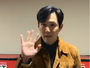

제목: [단독] "기훈이형, 얼으으음!" 이정재, '이노베이트코리아' 무대서 '오징어게임' 깜짝 재연
링크: //news.nate.com/view/20250409n41670?mid=n0100
--------------------------------------------------


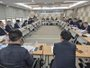

제목: 경상남도, 美 상호관세 대응 수출기업 '원팀' 구성…긴급자금 100억원 투입
링크: //news.nate.com/view/20250409n41669?mid=n0100
--------------------------------------------------


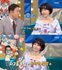

제목: 우희진 "지상렬과 썸 아냐…나랑 안 맞지만 멋진 사람" ('라디오스타')
링크: //news.nate.com/view/20250409n41668?mid=n0100
--------------------------------------------------


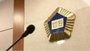

제목: '겨우 12살인데' 초등생 딸 친구 성착취물 만든 40대…법정에서 한 말이
링크: //news.nate.com/view/20250409n41666?mid=n0100
--------------------------------------------------


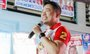

제목: "싱글맘과 하룻밤 보내겠다, 생리 중이라면"…정치인 망언에 필리핀 '발칵'
링크: //news.nate.com/view/20250409n41664?mid=n0100
--------------------------------------------------


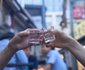

제목: 거래처 사람과 술 마시다 "중국인 아니냐"는 말에 격분, 흉기 살해하려한 50대
링크: //news.nate.com/view/20250409n41663?mid=n0100
--------------------------------------------------
이미지 없음
제목: [사설]헌법재판관 '임명'조차 거부하던 韓대행은 왜 표변했을까
링크: //news.nate.com/view/20250409n41661?mid=n0100
--------------------------------------------------


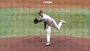

제목: 로젠버그 8이닝 완벽투…키움, LG 잡고 3연패 탈출
링크: //news.nate.com/view/20250409n41660?mid=n0100
--------------------------------------------------


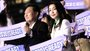

제목: "지구 495바퀴" 자화자찬하다…엑스포 유치전 처참한 실패
링크: //news.nate.com/view/20250409n38543?mid=n0100
--------------------------------------------------


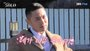

제목: 25기 영수, 영자 정리한다더니 "네가 너무 좋아" 돌직구 고백 (나는 솔로)
링크: //news.nate.com/view/20250409n41655?mid=n0100
--------------------------------------------------


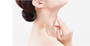

제목: "30초 동안 침 '8번' 삼킬 수 있나요?"···혹시 못 한다면 '이 암' 일 수도
링크: //news.nate.com/view/20250409n41654?mid=n0100
--------------------------------------------------


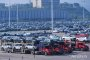

제목: [올댓차이나] 3월 中 승용차 판매량 196만대…전년비 14.4%↑
링크: //news.nate.com/view/20250409n41653?mid=n0100
--------------------------------------------------


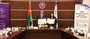

제목: 한수원, 요르단과 물속 우라늄 자원화 공동연구
링크: //news.nate.com/view/20250409n41652?mid=n0100
--------------------------------------------------


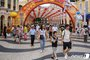

제목: 中정부, 미국 여행 위험 경보 발령…"위험 평가하고 주의하라"
링크: //news.nate.com/view/20250409n41632?mid=n0100
--------------------------------------------------


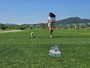

제목: 반려동물과 가볼 만한 봄 여행지, 순천…댕댕아 봄놀이 떠나자
링크: //news.nate.com/view/20250409n41649?mid=n0100
--------------------------------------------------


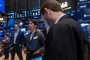

제목: 관세 시행 후 뉴욕 증시 초반 혼조···나스닥 1% 상승
링크: //news.nate.com/view/20250409n41648?mid=n0100
--------------------------------------------------


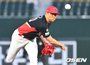

제목: 36이닝에서 끝난 연속 무실점 대기록…'네일 아트'는 개의치 않는다, "다시 시작할 기회니까" [오!쎈 부산]
링크: //news.nate.com/view/20250409n41646?mid=n0100
--------------------------------------------------


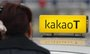

제목: '직무정지 가처분 인용' CFO 복귀설에 카카오모빌리티 "결정 없어"
링크: //news.nate.com/view/20250409n34708?mid=n0100
--------------------------------------------------


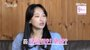

제목: '나는 솔로' 25기 현숙, 영철에 "현실적인 부분 고민"…직업이 걸림돌?
링크: //news.nate.com/view/20250409n41643?mid=n0100
--------------------------------------------------


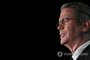

제목: 美재무 "동맹과는 관세 합의 가능성…이후 함께 중국에 대응"
링크: //news.nate.com/view/20250409n41641?mid=n0100
--------------------------------------------------


In [22]:
print_news_nate("최신뉴스")

In [47]:
import requests
from bs4 import BeautifulSoup
import os

def download_one_episode(title, no, url):

    req_header = {
    'referer' : url
    }

    res = requests.get(url, headers=req_header)



    if res.ok:
        # jpg 파일의 절대경로 url를 찾기
        soup = BeautifulSoup(res.text, 'html.parser')

        img_tags = soup.select("img[src*='IMAG01']")

        img_url_list = [img_tag['src'] for img_tag in img_tags]



        #img 디렉토리가 없으면 생성하기   
        imgdir_name = f'image.{title}.{no}'
        if not os.path.isdir(imgdir_name):
            os.mkdir(imgdir_name)

        for img_url in img_url_list:
            res = requests.get(img_url, headers=req_header)
            if res.ok:        
                # binary data 가져오기
                img_data = res.content
                # img/xxx.jpg 디렉토리명과 파일명을 join
                dir_name = os.path.join(imgdir_name, os.path.basename(img_url))
                # binday data를 file에 write하기
                with open(dir_name,'wb') as file:
                    print(f'writing to {dir_name}({len(img_data):,} bytes)')
                    file.write(img_data)
            else:
                print(f'Error Code = {res.status_code}')  
            
    else:
        print(f'Error Code = {res.status_code}')

In [48]:
download_one_episode('낢이사는이야기',48,'https://comic.naver.com/webtoon/detail?titleId=833255&no=49&week=tue')

writing to image.낢이사는이야기.48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_1.jpg(166,289 bytes)
writing to image.낢이사는이야기.48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_2.jpg(117,581 bytes)
writing to image.낢이사는이야기.48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_3.jpg(175,647 bytes)
writing to image.낢이사는이야기.48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_4.jpg(140,295 bytes)
writing to image.낢이사는이야기.48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_5.jpg(115,277 bytes)
writing to image.낢이사는이야기.48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_6.jpg(86,840 bytes)
writing to image.낢이사는이야기.48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_7.jpg(151,280 bytes)
writing to image.낢이사는이야기.48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_8.jpg(146,198 bytes)
writing to image.낢이사는이야기.48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_9.jpg(86,460 bytes)
writing to image.낢이사는이야기.48\20250310103947_792197c569e377c7f369fe9